In [22]:
# Data Handling & Preprocessing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import VotingClassifier

# Saving & Loading Models
import joblib



In [2]:
credit_card_F_dataset = pd.read_csv("C:\\Users\\USER\\Downloads\\creditcard.csv")

In [3]:
credit_card_F_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check class distribution
credit_card_F_dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Class Distribution')

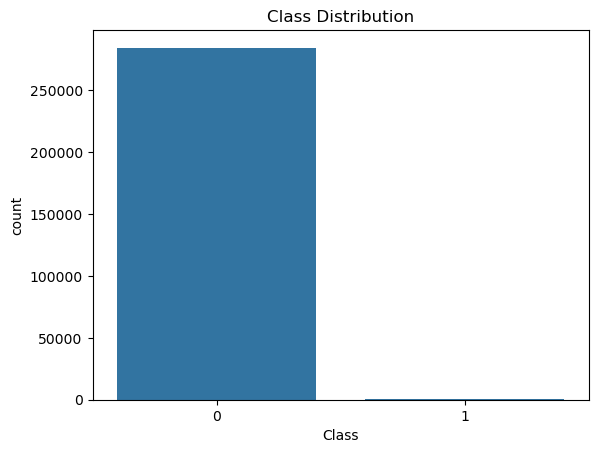

In [6]:
# Plot class distribution

sns.countplot(x=credit_card_F_dataset["Class"])
plt.title("Class Distribution")
#plt.show()

In [ ]:
# imbalance ratio of fruad cases and normal cases

fraud_cases = credit_card_F_dataset[credit_card_F_dataset["Class"] == 1]
normal_cases = credit_card_F_dataset[credit_card_F_dataset["Class"] == 0]

imbalance_ratio = len(normal_cases) / len(fraud_cases)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 577.88


In [8]:
print('Shape of Fraud Cases =', fraud_cases.shape)  # shape of fraud_cases

print('Shape of Normal Cases =', normal_cases.shape) # shape of normal_cases

Shape of Fraud Cases = (492, 31)
Shape of Normal Cases = (284315, 31)


In [9]:
# check for nulls or missing values

credit_card_F_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Preprocessing

In [10]:
# Scale 'Amount' feature
scaler = StandardScaler()
credit_card_F_dataset["Amount"] = scaler.fit_transform(credit_card_F_dataset[["Amount"]])

# Drop 'Time' column
credit_card_F_dataset.drop(columns=["Time"], inplace=True)

# Define features & target
X = credit_card_F_dataset.drop(columns=["Class"])
y = credit_card_F_dataset["Class"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Confirm changes
credit_card_F_dataset.head()  # Display first few rows of the dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [13]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Handling Imbalance & Model Training

In [14]:
# Logistic Regression (Weighted)

# Initialize the Logistic Regression model
# - class_weight="balanced" adjusts weights to handle class imbalance
# - random_state=42 ensures reproducibility of results
log_model = LogisticRegression(class_weight="balanced", random_state=42)

# Train (fit) the model using the training dataset
# The model learns patterns from X_train (features) and y_train (labels)
log_model.fit(X_train, y_train)

# Make predictions on the test dataset
# The model predicts whether transactions in X_test are fraud (1) or not (0)
y_pred_log = log_model.predict(X_test)


In [15]:
# Initialize the Random Forest model
# - class_weight="balanced" handles the class imbalance by assigning higher weight to minority class (fraud cases)
# - random_state=42 ensures reproducibility of results
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train (fit) the model using the training dataset
# The model learns patterns from X_train (features) and y_train (labels)
rf_model.fit(X_train, y_train)

# Make predictions on the test dataset
# The model predicts whether transactions in X_test are fraud (1) or normal (0)
y_pred_rf = rf_model.predict(X_test)

In [16]:
# XGBoost (Custom Scale Weights)

# Calculate the class weight ratio (to handle imbalanced data)
# fraud_ratio is the ratio of normal transactions to fraud transactions in the training set
fraud_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize the XGBoost model
# - scale_pos_weight=fraud_ratio assigns more weight to fraud cases, making the model more sensitive to fraud detection
# - random_state=42 ensures reproducibility of results
xgb_model = XGBClassifier(scale_pos_weight=fraud_ratio, random_state=42)

# Train (fit) the XGBoost model using the training dataset
xgb_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_xgb = xgb_model.predict(X_test)

Model Evaluation

In [17]:
# Define a function to evaluate the model's performance
def evaluate_model(model_name, y_test, y_pred):
    """
    Evaluates the model performance using precision, recall, F1-score, and AUC-PR.
    
    Parameters:
    - model_name: Name of the model (string)
    - y_test: True labels of the test dataset
    - y_pred: Predicted labels by the model
    
    Returns:
    - Prints the model performance metrics
    """
    
    # Calculate Precision (how many predicted fraud cases are actually fraud)
    precision = precision_score(y_test, y_pred)
    
    # Calculate Recall (how many actual fraud cases were detected)
    recall = recall_score(y_test, y_pred)
    
    # Calculate F1-Score (harmonic mean of precision and recall)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate AUC-PR (Area under Precision-Recall curve, good for imbalanced data)
    auc_pr = average_precision_score(y_test, y_pred)

    # Print the evaluation results
    print(f"\n📌 {model_name} Performance:")
    print(f"Precision: {precision:.4f}")  # Displaying with 4 decimal places
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-PR: {auc_pr:.4f}")

# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)



📌 Logistic Regression Performance:
Precision: 0.0588
Recall: 0.9184
F1-Score: 0.1105
AUC-PR: 0.0541

📌 Random Forest Performance:
Precision: 0.9610
Recall: 0.7551
F1-Score: 0.8457
AUC-PR: 0.7261

📌 XGBoost Performance:
Precision: 0.8830
Recall: 0.8469
F1-Score: 0.8646
AUC-PR: 0.7481


Fine-Tuning XGBoost for Better Fraud Detection

In [18]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7, 9],  # Maximum depth of each tree (controls model complexity)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of training data used for boosting (for regularization)
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used per tree (for diversity)
    'scale_pos_weight': [fraud_ratio, fraud_ratio * 1.5, fraud_ratio * 2]  # Adjusts weight for imbalanced classes
}

# Initialize an XGBoost model
xgb_model = XGBClassifier(random_state=42)  # Ensures reproducibility

# Randomized Search for best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model,  # Base model
    param_distributions=param_grid,  # Parameter grid to search
    n_iter=20,  # Number of different parameter combinations to try
    scoring='average_precision',  # Optimization metric (focuses on fraud detection)
    cv=3,  # 3-fold cross-validation (splits data into 3 sets for training/testing)
    verbose=2,  # Prints progress for monitoring
    n_jobs=-1  # Uses all available CPU cores to speed up training
)

# Fit the model on training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("🔎 Best Hyperparameters:", random_search.best_params_)

# Retrieve the best model from the search
best_xgb = random_search.best_estimator_

# Make predictions using the best XGBoost model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the tuned model's performance
evaluate_model("Tuned XGBoost", y_test, y_pred_best_xgb)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
🔎 Best Hyperparameters: {'subsample': 0.9, 'scale_pos_weight': 865.9302030456854, 'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.7}

📌 Tuned XGBoost Performance:
Precision: 0.8817
Recall: 0.8367
F1-Score: 0.8586
AUC-PR: 0.7380


C:\Users\USER\AppData\Local\Temp\ipykernel_23128\1479518646.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


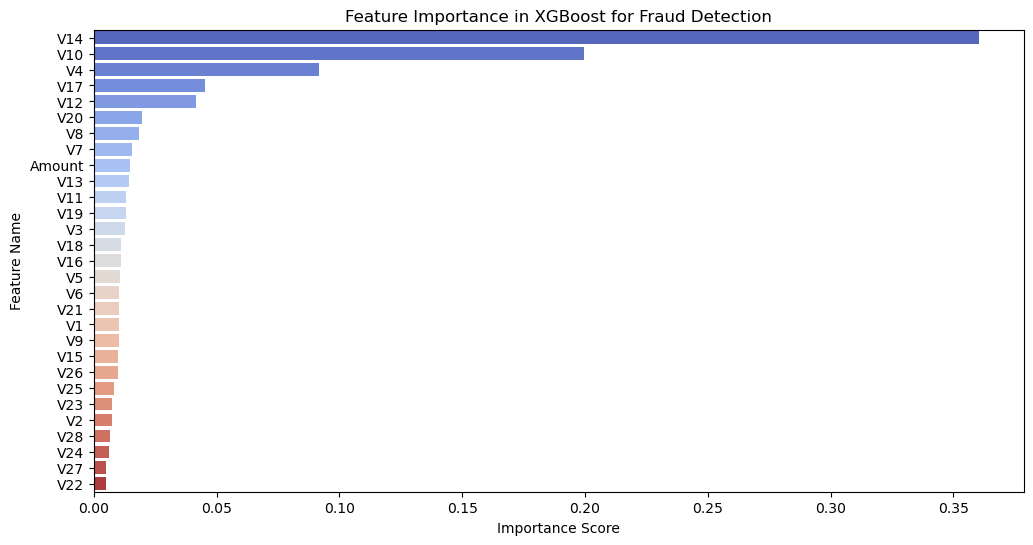

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the best XGBoost model
feature_importance = best_xgb.feature_importances_

# Create a DataFrame for visualization
feature_names = X_train.columns  # Get feature names from dataset
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance in XGBoost for Fraud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


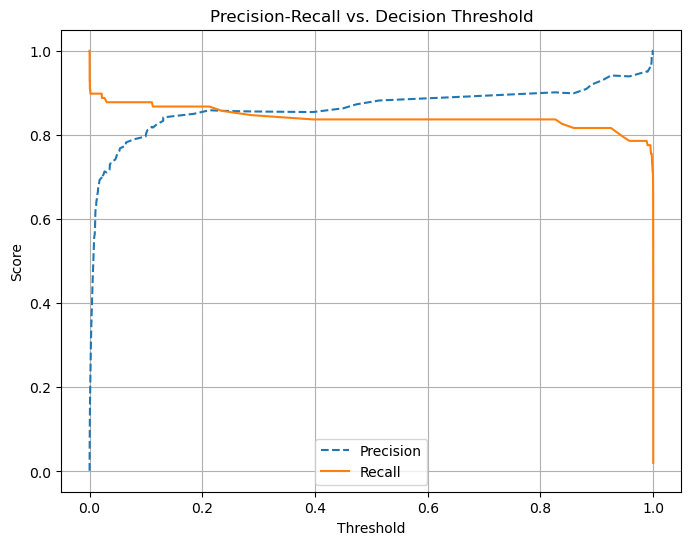

In [25]:
from sklearn.metrics import precision_recall_curve

# Get predicted fraud probabilities
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]  # Probability of fraud (class 1)

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Decision Threshold")
plt.legend()
plt.grid()
plt.show()


In [23]:
# ---- STEP 1: FIND THE BEST THRESHOLD ----

def find_best_threshold(y_test, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    f1_scores = (2 * precisions * recalls) / (precisions + recalls)
    best_index = np.nanargmax(f1_scores)  # Ignore NaN values
    best_threshold = thresholds[best_index]
    print(f'🚀 Best Threshold: {best_threshold:.4f}')
    return best_threshold

# Get fraud probabilities from the best XGBoost model
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]
best_threshold = find_best_threshold(y_test, y_pred_prob)

# Make predictions using the best threshold
y_pred_best_thresh = (y_pred_prob >= best_threshold).astype(int)
evaluate_model("XGBoost with Optimized Threshold", y_test, y_pred_best_thresh)


🚀 Best Threshold: 0.9251

📌 XGBoost with Optimized Threshold Performance:
Precision: 0.9412
Recall: 0.8163
F1-Score: 0.8743
AUC-PR: 0.7686


In [24]:
# ---- STEP 2: BUILD ENSEMBLE MODEL ----

# Define individual models
log_model = LogisticRegression(class_weight="balanced", random_state=42)
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=fraud_ratio, random_state=42)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[("Logistic Regression", log_model), 
                ("Random Forest", rf_model), 
                ("XGBoost", xgb_model)],
    voting="soft"  # Use soft voting (averages predicted probabilities)
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict fraud probabilities
y_pred_prob_ensemble = ensemble_model.predict_proba(X_test)[:, 1]

# Apply the best threshold found earlier
y_pred_ensemble = (y_pred_prob_ensemble >= best_threshold).astype(int)

# Evaluate Ensemble Model
evaluate_model("Ensemble Model (XGBoost + RF + Logistic)", y_test, y_pred_ensemble)


📌 Ensemble Model (XGBoost + RF + Logistic) Performance:
Precision: 0.9683
Recall: 0.6224
F1-Score: 0.7578
AUC-PR: 0.6033


Ensemble Model Tuning

In [27]:
# Step 1: Adjust the Decision Threshold
def adjust_threshold(model, X_test, y_test, threshold=0.5):
    y_probs = model.predict_proba(X_test)[:, 1]  # Get fraud probabilities
    y_pred = (y_probs >= threshold).astype(int)  # Apply custom threshold
    return y_pred

# Ensure all models are trained before using them
if not hasattr(rf_model, "classes_"):
    rf_model.fit(X_train, y_train)
if not hasattr(log_model, "classes_"):
    log_model.fit(X_train, y_train)

# Step 2: Reweight Models in the Ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),  # Best XGBoost Model
        ('rf', rf_model),  # Random Forest Model
        ('log', log_model)  # Logistic Regression Model
    ],
    voting='soft',  # Use probability-based voting
    weights=[3, 2, 1]  # Assign higher weight to XGBoost
)
ensemble_model.fit(X_train, y_train)

# Step 3: Apply Stacking Instead of Averaging
stacking_model = LogisticRegression()
stacking_features = np.column_stack([
    best_xgb.predict_proba(X_test)[:, 1],
    rf_model.predict_proba(X_test)[:, 1],
    log_model.predict_proba(X_test)[:, 1]
])
stacking_model.fit(stacking_features, y_test)
y_pred_stacked = stacking_model.predict(stacking_features)

# Evaluate the Stacking Model
precision = precision_score(y_test, y_pred_stacked)
recall = recall_score(y_test, y_pred_stacked)
f1 = f1_score(y_test, y_pred_stacked)
auc_pr = average_precision_score(y_test, y_pred_stacked)

print("\n\U0001F4CC Stacked Model Performance:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")


📌 Stacked Model Performance:
Precision: 0.9412
Recall: 0.8163
F1-Score: 0.8743
AUC-PR: 0.7686
